## standard error

- Assume that n is sufficiently large random samples from the population
- Sample standard deviation can be estimated as $σ \over \sqrt{n}$
- In this data, standard error can be estimated as sample standard deviation
- So, population can be in the range 
$$\mu - z{σ \over \sqrt{n}} < \hat X <\mu + z{σ \over \sqrt{n}}$$
- $z$ will be 1.96 at 95% confidence interval, 2.58 at 99% confidence interval.

## test with one data

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("data/1_basic/train.csv")

In [4]:
data.loc[0]

Unnamed: 0                                                        0
id                                                        c12129c31
excerpt           when the young people returned to the ballroom...
target                                                    -0.340259
standard_error                                             0.464009
Name: 0, dtype: object

In [6]:
# 95% confidence interval
min_ = data.loc[0]["target"] - 1.96*data.loc[0]["standard_error"]
max_ = data.loc[0]["target"] + 1.96*data.loc[0]["standard_error"]

print(min_, max_)

-1.24971685516 0.56919860516


In [7]:
import random

In [10]:
print(random.uniform(min_, max_))

-0.7490025048249095


## test "target" with frequency distribution table

"target" is continuous label, so check the frequency distribution table with suitable section.

In [13]:
import numpy as np
import seaborn as sns

In [18]:
target = np.array(data["target"])
len(target)

2833

In [17]:
np.histogram(target, 40)

(array([  9,  10,  16,  20,  19,  22,  40,  39,  55,  64,  75,  86,  87,
         86, 115, 114, 113, 118, 129, 130, 130, 141, 162, 130, 119, 116,
        120, 102,  95,  82,  66,  69,  37,  36,  35,  15,  16,   7,   5,
          3], dtype=int64),
 array([-3.67626777, -3.54157633, -3.40688489, -3.27219345, -3.13750201,
        -3.00281057, -2.86811913, -2.73342769, -2.59873625, -2.46404481,
        -2.32935337, -2.19466193, -2.05997049, -1.92527905, -1.79058761,
        -1.65589617, -1.52120473, -1.38651329, -1.25182185, -1.11713041,
        -0.98243897, -0.84774753, -0.71305609, -0.57836465, -0.44367321,
        -0.30898177, -0.17429033, -0.03959889,  0.09509255,  0.22978399,
         0.36447543,  0.49916687,  0.63385831,  0.76854975,  0.90324119,
         1.03793263,  1.17262407,  1.30731551,  1.44200695,  1.57669839,
         1.71138983]))

<AxesSubplot:>

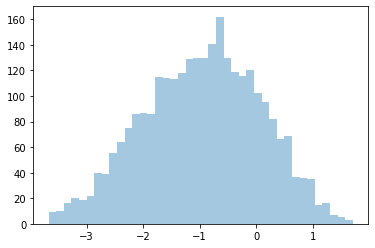

In [16]:
sns.distplot(target, bins=40, kde=False)

In [27]:
print(len(np.histogram(target, 40)[1]))

41


In [28]:
print(np.min(target), np.max(target))

-3.676267773 1.711389827


**Augmentation Step**

1. set up the number of sections. (like np.histogram bin=40)
2. get the frequency distribution table. <br>
    for each section, min, max, height value needed.
3. get the max height.
4. for each section, augment the number of data equal as max height. <br>
    if use text augmentation, apply it.

※ maybe, use only text augmentation and set the label same as original one.

## Augmentation Dataset Possibility

1. use original data (basic + stemming)
2. just text augmentation <br>
    use EDA(https://github.com/jasonwei20/eda_nlp) <br>
    the paper(https://arxiv.org/pdf/1901.11196v2.pdf) recommends that <br>
    if $N_{train} = 2000$, it is ideal that $\alpha = 0.05, N_{aug} = 8$ <br>
    2-1. sustain distribution <br>
    2-2. set equaly number of samples per each section
3. label augmentation (following above augmentation step) <br>
    3-1. // <br>
    3-2. // 
4. text and label augmentation <br>
    4-1. // <br>
    4-2. //

## Text Augmentation

In [29]:
import nltk 
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [30]:
import os

In [33]:
if not os.path.isdir("eda_test"):
    os.mkdir("eda_test")

In [37]:
with open("eda_test/test_one_sentences.txt", "w", encoding="utf-8") as f:
    f.write(str(data.loc[0]["target"]) + "\t" + data.loc[0]["excerpt"].replace("\n", " "))

In [40]:
# 코드 제출할 때에는 git clone으로 사용하기

# num_aug : N of augmented data
# Synonym Replacement (SR): replace a word with a synonym
# Random Insertion (RI): insert synonym to the random position in the sentence
# Random Swap (RS): replace two wrods in a sentence
# Random Deletion (RD): delete a word in a sentence

!python eda_nlp-master/code/augment.py \
    --input=eda_test/test_one_sentences.txt \
    --output=eda_test/test_one_sentences_output.txt \
    --num_aug=8 \
    --alpha_sr=0.1 --alpha_rd=0.1 --alpha_ri=0.1 --alpha_rs=0.1

generated augmented sentences with eda for eda_test/test_one_sentences.txt to eda_test/test_one_sentences_output.txt with num_aug=8


## Text & Label Augmentation (Same Distribution)

In [47]:
import copy

In [72]:
# make the label, text filev 
data_to_augementation = copy.deepcopy(data)
data_to_augementation["target_"] = data["id"].map(str) + " " \
    + data["target"].map(str) + " " + data["standard_error"].map(str)
data_to_augementation = data_to_augementation[["target_", "excerpt"]]
data_to_augementation.head()

,target_,excerpt
0,c12129c31 -0.340259125 0.464009046,when the young people returned to the ballroom...
1,85aa80a4c -0.315372342 0.48080497,"all through dinner time, mrs. fayre was somewh..."
2,b69ac6792 -0.580117966 0.476676226,"as roger had predicted, the snow departed as q..."
3,dd1000b26 -1.05401339 0.450007142,and outside before the palace a great garden w...
4,37c1b32fb 0.247197446 0.510844957,once upon a time there were three bears who li...


In [200]:
def text_clean(x):
    x = x.replace("\n", " ")
    x = x.replace("\t", " ")
    return x.strip()

In [74]:
data_to_augementation["excerpt"] = data_to_augementation["excerpt"].apply(text_clean)
data_to_augementation.loc[0]["excerpt"]

'when the young people returned to the ballroom, it presented a decidedly changed appearance. instead of an interior scene, it was a winter landscape. the floor was covered with snow-white canvas, not laid on smoothly, but rumpled over bumps and hillocks, like a real snow field. the numerous palms and evergreens that had decorated the room, were powdered with flour and strewn with tufts of cotton, like snow. also diamond dust had been lightly sprinkled on them, and glittering crystal icicles hung from the branches. at each end of the room, on the wall, hung a beautiful bear-skin rug. these rugs were for prizes, one for the girls and one for the boys. and this was the game. the girls were gathered at one end of the room and the boys at the other, and one end was called the north pole, and the other the south pole. each player was given a small flag which they were to plant on reaching the pole. this would have been an easy matter, but each traveller was obliged to wear snowshoes.'

In [75]:
data_to_augementation.to_csv(
    "eda_test/basic_data.txt", 
    index=False, header=None, 
    sep="\t",
    encoding="utf-8"
)

In [76]:
# text augmentation
!python eda_nlp-master/code/augment.py \
    --input=eda_test/basic_data.txt \
    --output=eda_test/aug_basic_data.txt \
    --num_aug=8 \
    --alpha_sr=0.1 --alpha_rd=0.1 --alpha_ri=0.1 --alpha_rs=0.1

generated augmented sentences with eda for eda_test/basic_data.txt to eda_test/aug_basic_data.txt with num_aug=8


In [201]:
# label augmentation

new_data = []
original_data = copy.deepcopy(data)
original_data["excerpt"] = original_data["excerpt"].apply(text_clean)

with open("eda_test/aug_basic_data.txt", "r", encoding="utf-8") as f:
    recent_id = None
    
    for line in f:
        label, excerpt = line.split("\t")
        id_, target, standard_error = label.split(" ")
        target_ = float(target)
        standard_error = float(standard_error)
        excerpt = text_clean(excerpt)

        if recent_id != id_:
            original = original_data[original_data["id"] == id_]
            new_data.append(list(original.iloc[0])[1:])
            
            recent_id = id_
        
        min_ = target_ - 1.96*standard_error
        max_ = target_ + 1.96*standard_error
        target = random.uniform(min_, max_)
        
        new_data.append([id_, excerpt, target, standard_error])
        

In [184]:
len(new_data)

28330

In [202]:
new_data_df = pd.DataFrame(new_data, columns=["id", "excerpt", "target", "standard_error"])
new_data_df[:11]

,id,excerpt,target,standard_error
0,c12129c31,when the young people returned to the ballroom...,-0.340259,0.464009
1,c12129c31,when the young people returned to the ballroom...,-0.003837,0.464009
2,c12129c31,when the young people returned to the ballroom...,-1.130945,0.464009
3,c12129c31,when the young people returned to the ballroom...,0.058824,0.464009
4,c12129c31,when the young people returned to the ballroom...,-0.797085,0.464009
5,c12129c31,when the lightly people returned on the ballro...,0.393137,0.464009
6,c12129c31,when the these people returned to the ballroom...,-0.090488,0.464009
7,c12129c31,the young people to the ballroom it presented ...,0.498392,0.464009
8,c12129c31,when the young people returned to the ballroom...,-0.016149,0.464009
9,c12129c31,when the young people returned to the ballroom...,-0.320396,0.464009


In [191]:
len(new_data_df)

28330

In [169]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

<Figure size 432x288 with 0 Axes>

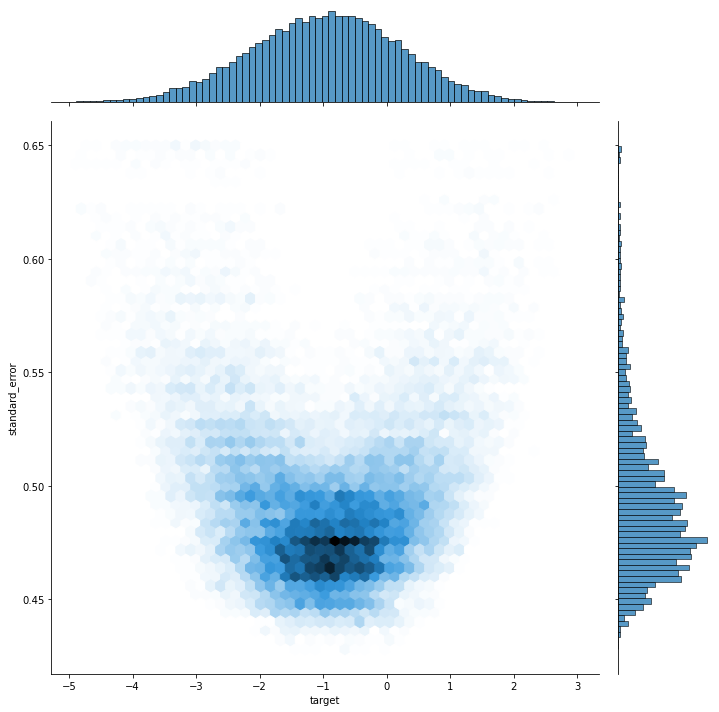

In [168]:
plt.clf()

sns.jointplot(x=new_data_df["target"], y=new_data_df["standard_error"], kind="hex", height=10)

plt.show()

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Figure size 432x288 with 0 Axes>

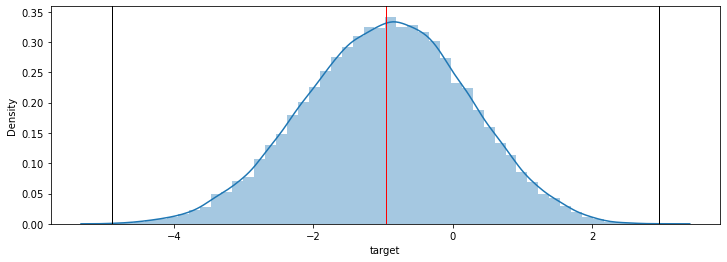

In [172]:
plt.clf()
plt.figure(figsize=(12, 4))

sns.distplot(new_data_df["target"])
plt.axvline(x=np.mean(new_data_df["target"]), linewidth=1, color='red')
plt.axvline(x=np.min(new_data_df["target"]), linewidth=1, color='black')
plt.axvline(x=np.max(new_data_df["target"]), linewidth=1, color='black')

plt.show()

In [203]:
# save the data
if not os.path.isdir("data/4_augmentation"):
    os.mkdir("data/4_augmentation")

new_data_df[["id", "excerpt", "target"]].to_csv("data/4_augmentation/aug_10_data.txt", sep="\t", index=False, encoding="utf-8")

In [204]:
# save the stemmed data

In [205]:
import nltk

In [206]:
def get_stem_result(string):
    stemmer = nltk.stem.SnowballStemmer('english')
    stems = []
    
    for element in nltk.word_tokenize(string):
        stems.append(stemmer.stem(element))

    return " ".join(stems)

In [207]:
new_data_df["excerpt"] = new_data_df["excerpt"].apply(get_stem_result)

In [208]:
new_data_df[["id", "excerpt", "target"]].to_csv("data/4_augmentation/stemmed_aug_10_data.txt", sep="\t", index=False, encoding="utf-8")